In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# database connections 

In [4]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [5]:
cursor.execute("select name from sqlite_master where type = 'table';")
print('Print list of the tables present in the database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

Print list of the tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [17]:
aircraft = pd.read_sql_query('select * from aircrafts_data', connection)
aircraft.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [18]:
airport = pd.read_sql_query('select * from airports_data', connection)
airport.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [19]:
boarding_passes = pd.read_sql_query('select * from boarding_passes', connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [20]:
bookings = pd.read_sql_query('select * from bookings', connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [21]:
flights = pd.read_sql_query('select * from flights', connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [22]:
seats = pd.read_sql_query('select * from seats', connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [23]:
ticket_flights = pd.read_sql_query('select * from ticket_flights', connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [44]:
tickets = pd.read_sql_query('select * from tickets', connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [39]:
for table in table_list:
    print('\ntable :', table)
    column_info = connection.execute('PRAGMA table_info({})'.format(table))
    for column in column_info.fetchall():
        print(column[1:3])
        


table : aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table : airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table : boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table : bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table : flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table : seats
('aircraft_code', 'character(3)')
('seat_no', 'character var

In [43]:
for table in table_list:
    print('\nTable name :', table)
    df_table = pd.read_sql_query(f'select * from {table}' , connection)
    print(df_table.isnull().sum())
    


Table name : aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Table name : airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Table name : boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Table name : bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

Table name : flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Table name : seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Table name : ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

Table name : tickets
ticket_no       0
book_ref        0
pass

In [55]:
df_seats  = pd.read_sql_query(f'select aircraft_code , count(aircraft_code) as no_of_seats from seats group by aircraft_code having count(aircraft_code) >100', connection)
df_seats

,aircraft_code,no_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


In [69]:
tickets = pd.read_sql_query('''select * from tickets
                                join bookings on  tickets.book_ref = bookings.book_ref''', connection)
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
tickets.head()

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03


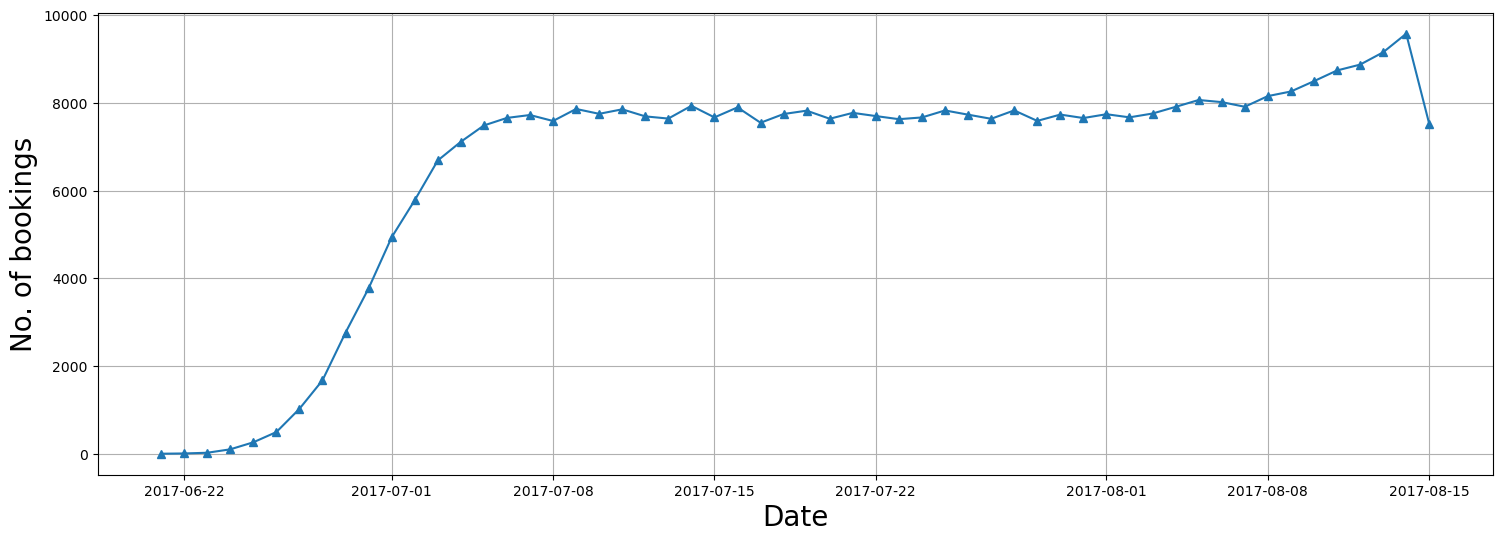

In [79]:
x = tickets.groupby('date')[['date']].count()
plt.figure(figsize= (18,6))
plt.plot(x.index , x['date'], marker = '^')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('No. of bookings' , fontsize = 20)
plt.grid('b')
plt.show()

In [94]:
df_booking = pd.read_sql_query('select * from bookings', connection)
df_booking['book_date']= pd.to_datetime(df_booking['book_date'])
df_booking['book_date'] = df_booking['book_date'].dt.date

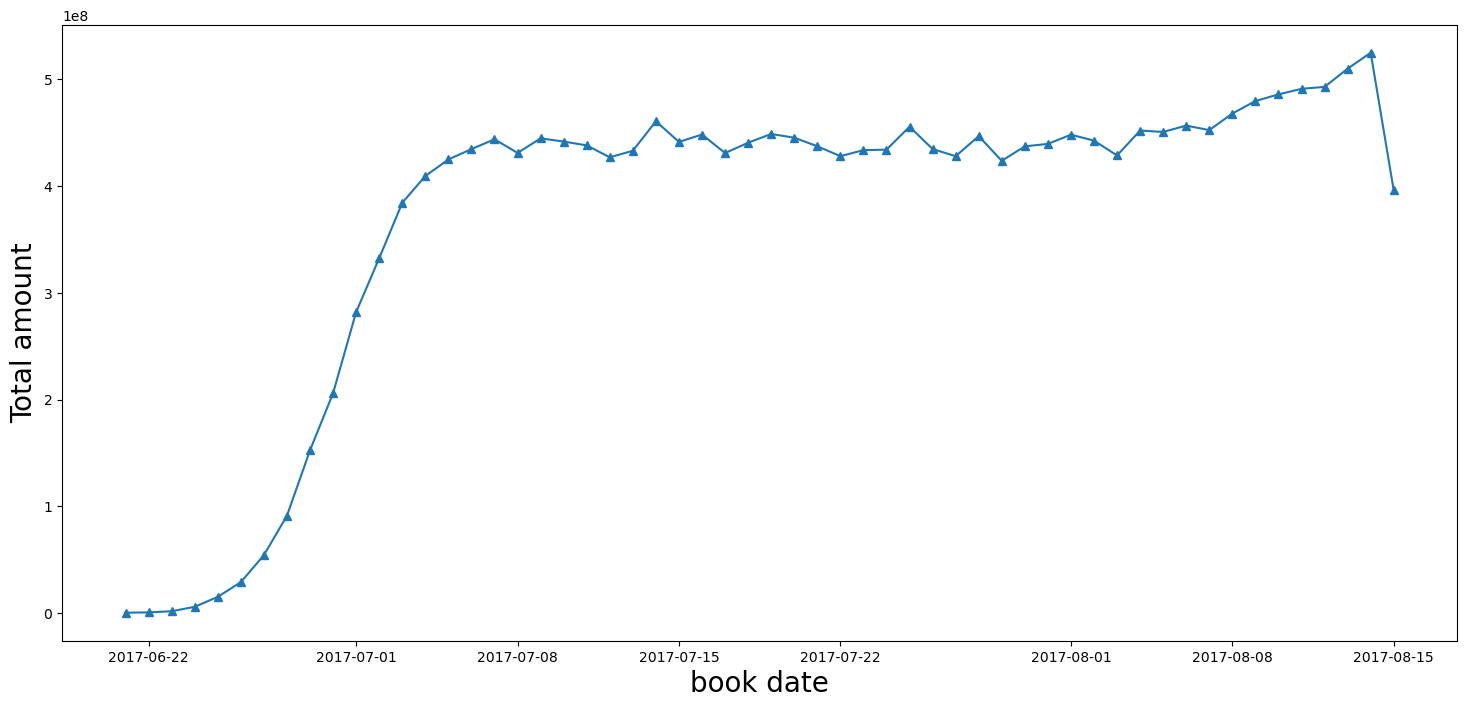

In [96]:
x = df_booking.groupby('book_date')[['total_amount']].sum()
plt.figure(figsize = (18,8))
plt.plot(x.index , x['total_amount'], marker = '^')
plt.xlabel('book date', fontsize = 20)
plt.ylabel('Total amount', fontsize = 20)
plt.show()

#### Calculate the average charges for each aircraft with different fare conditions.


In [105]:
df = pd.read_sql_query('''select aircraft_code , fare_conditions, avg(amount) as AVG  from flights
                            join ticket_flights on flights.flight_id = ticket_flights.flight_id 
                            group by aircraft_code, fare_conditions ''', connection)
df

,aircraft_code,fare_conditions,AVG
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


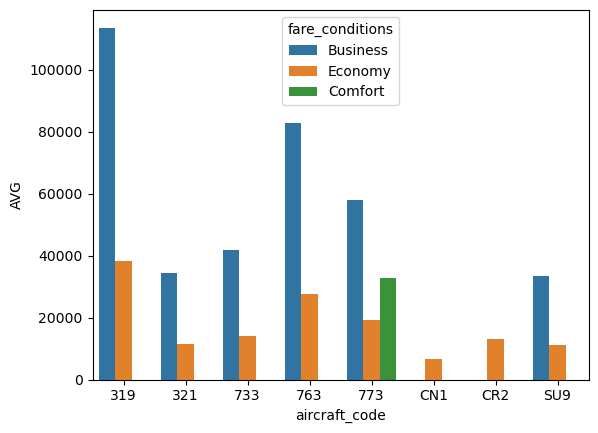

In [108]:
sns.barplot(data = df , x ='aircraft_code' , y = 'AVG' , hue = 'fare_conditions')
plt.show()

## Analyzing occupancy rate
#### For each aircraft, calculate the total revenue per year and the average revenue per ticket.


In [123]:
df_rev = pd.read_sql_query(''' select aircraft_code , ticket_count, Total_revenue , 
                                (Total_revenue / ticket_count) as Avg_rev_per_ticket from 
                                 (select aircraft_code , count(*) as ticket_count, sum(amount) as Total_revenue from ticket_flights 
                                join flights on ticket_flights.flight_id= flights.flight_id 
                                group by aircraft_code) ''',connection)
df_rev

,aircraft_code,ticket_count,Total_revenue,Avg_rev_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


#### Calculate the average occupancy per aircraft.


In [147]:
df_occupancy = pd.read_sql_query(''' select a.aircraft_code , avg(a.no_of_seats) as booked_seats, (b.num_seats),
                                    avg(a.no_of_seats)/ b.num_seats as occupancy_rate 
                                    from (select aircraft_code ,flights.flight_id,  count(*) as no_of_seats from boarding_passes
                                    join flights on boarding_passes.flight_id = flights.flight_id  
                                    group by aircraft_code , flights.flight_id) as a
                                    join (select aircraft_code , count(*) as num_seats from seats group by aircraft_code ) as b 
                                    on a.aircraft_code = b.aircraft_code 
                                    group by a.aircraft_code   ''' , connection)


In [148]:
df_occupancy

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


#### Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.


In [149]:
df_occupancy['occupancy_rate_10%'] = df_occupancy['occupancy_rate'] + df_occupancy['occupancy_rate']*0.1

In [150]:
df_occupancy

,aircraft_code,booked_seats,num_seats,occupancy_rate,occupancy_rate_10%
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [159]:
pd.set_option('display.float_format' , str)

In [160]:

total_revenue = pd.read_sql_query('''select aircraft_code, sum(amount) as total_revenue from ticket_flights
 Join flights on ticket_flights.flight_id = flights.flight_id 
 group by aircraft_code ''', connection)
df_occupancy[ 'Inc Total Annual Turnover'] = (total_revenue['total_revenue']/df_occupancy['occupancy_rate'])*df_occupancy['occupancy_rate']
df_occupancy


,aircraft_code,booked_seats,num_seats,occupancy_rate,occupancy_rate_10%,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2706163100.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1638164100.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1426552100.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4371277100.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3431205500.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,96373800.0
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,1982760500.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5114484700.0
